In [55]:
import os
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
import tensorflow
from keras.optimizers import adam_v2

In [56]:
dataset = loadtxt('results_for_model.csv', delimiter=',')

In [ ]:
dataset

In [57]:
X = dataset[:,1:44]
y = dataset[:,0]

### Train

In [281]:
model = Sequential()
model.add(Dense(100, input_dim=43, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [282]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [283]:
history=model.fit(X, y, epochs=120, batch_size=32)


Epoch 1/120
18/18 [==============================] - 1s 2ms/step - loss: 0.8012 - accuracy: 0.5270
Epoch 2/120
18/18 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5429
Epoch 3/120
18/18 [==============================] - 0s 1ms/step - loss: 0.6453 - accuracy: 0.6386
Epoch 4/120
18/18 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6371
Epoch 5/120
18/18 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.5824
Epoch 6/120
18/18 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5848
Epoch 7/120
18/18 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6383
Epoch 8/120
18/18 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6016
Epoch 9/120
18/18 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.5890
Epoch 10/120
18/18 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6680
Epoch 11/

18/18 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9439
Epoch 84/120
18/18 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9424
Epoch 85/120
18/18 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9352
Epoch 86/120
18/18 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8305
Epoch 87/120
18/18 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.8786
Epoch 88/120
18/18 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.8998
Epoch 89/120
18/18 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9245
Epoch 90/120
18/18 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.8727
Epoch 91/120
18/18 [==============================] - 0s 1ms/step - loss: 0.2005 - accuracy: 0.9141
Epoch 92/120
18/18 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9277
Epoch 93/120


In [284]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 957us/step - loss: 0.0334 - accuracy: 0.9891
Accuracy: 98.91


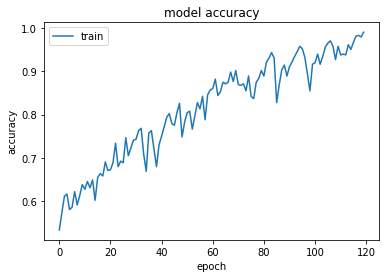

In [285]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


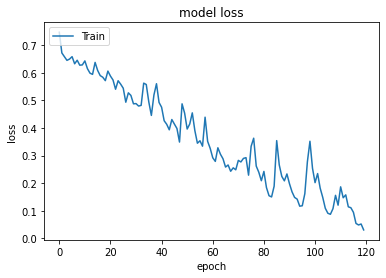

In [286]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save_weightss

### Trining 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Making predections

In [287]:

# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(500):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

/Users/shahrasm/myenv/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1.878222, 0.025681078, 0.52237844, 1.8065064, 0.086187534, 2.5902615, 0.30262053, 0.36560035, 0.20435119, 0.2101779, 3.686482, 6.49, 9.46, 0.001965188, 0.5088458, -1.3966607, 0.41662937, -0.13007131, 63.86741, 0.5397498, -0.43490785, 4.756016, 10.383291, 5.6272755, 47.14802, 59.051098, -20.97604, -4.797928, 0.003801672, 0.64, 0.8666642, 0.016002247, 0.44089413, 1.0824465, -0.45167089, 8.369121, 1.867811, 0.1552547, 1.7596527, 0.30535096, 0.14559668, 16.898602, -5.500427] => 1 (expected 1)
[1.4507407, 0.001530796, 1.2496029, 2.376228, 0.001833792, 2.2439249, 0.20382714, 0.18826509, 0.105234265, 0.10387254, 6.0879903, 22.74, 22.47, 0.000333417, 0.4982494, -1.4852233, 0.000198246, -0.833681, 43.680187, 0.5817998, -1.2777078, 8.745654, 12.019388, 3.273734, 37.00784, 50.235462, -14.2186985, 4.16191, 0.000815679, 3.4229412, 0.62327325, 0.32474786, 0.2677447, 0.47059005, -0.37304914, 3.7674577, 1.1372191, 2.3487074, 1.3197995, 0.14500375, 0.002629839, 2.2443027, -2.8999345] => 1 (expected 1)